In [1]:
import matplotlib.pyplot as plt # plotting
import numpy as np 
import pandas as pd 

from sklearn.preprocessing import StandardScaler

In [10]:
data = pd.read_csv('bank-full.csv',sep=';')

In [11]:
data.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [12]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [14]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [15]:
data.shape

(45211, 17)

In [27]:
print(data['contact'].unique())
print(data['default'].unique())
print(data['poutcome'].unique())
print(data['month'].unique())

['unknown' 'cellular' 'telephone']
['no' 'yes']
['unknown' 'failure' 'other' 'success']
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']


In [28]:
# Check the distribution of the target variable
print(data['y'].value_counts())


y
no     39922
yes     5289
Name: count, dtype: int64


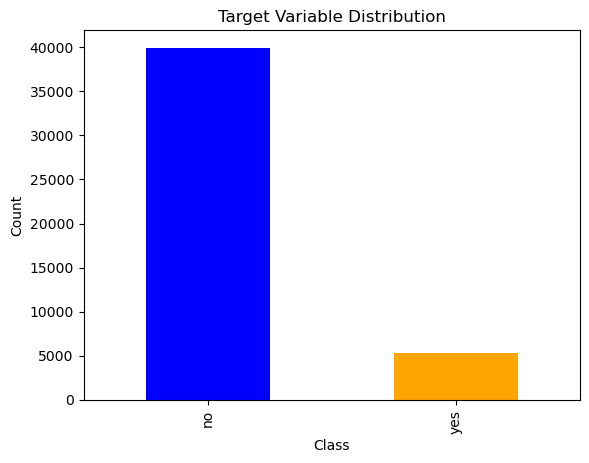

In [29]:
import matplotlib.pyplot as plt

# Plot class distribution
data['y'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title('Target Variable Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


In [31]:
print(X.dtypes)


age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
dtype: object


In [38]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns using LabelEncoder
label_encoders = {}
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le  


In [39]:
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)


In [40]:
print(X.dtypes)


age            int64
balance        int64
day            int64
duration       int64
campaign       int64
pdays          int64
previous       int64
job_1           bool
job_2           bool
job_3           bool
job_4           bool
job_5           bool
job_6           bool
job_7           bool
job_8           bool
job_9           bool
job_10          bool
job_11          bool
marital_1       bool
marital_2       bool
education_1     bool
education_2     bool
education_3     bool
default_1       bool
housing_1       bool
loan_1          bool
contact_1       bool
contact_2       bool
month_1         bool
month_2         bool
month_3         bool
month_4         bool
month_5         bool
month_6         bool
month_7         bool
month_8         bool
month_9         bool
month_10        bool
month_11        bool
poutcome_1      bool
poutcome_2      bool
poutcome_3      bool
dtype: object


In [56]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

from collections import Counter
print(Counter(y_resampled))


Counter({'no': 39922, 'yes': 39922})


In [57]:
resampled_data = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled, columns=['y'])], axis=1)

resampled_data.to_csv('resampled_data.csv', index=False)


In [58]:
from sklearn.metrics import accuracy_score, classification_report

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.2f}")

# Detailed classification report
print(classification_report(y_test, y_pred))



Accuracy Score: 0.94
              precision    recall  f1-score   support

          no       0.94      0.95      0.94     11973
         yes       0.95      0.94      0.94     11981

    accuracy                           0.94     23954
   macro avg       0.94      0.94      0.94     23954
weighted avg       0.94      0.94      0.94     23954



In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # 'yes' → 1, 'no' → 0

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Train Linear Regression
LR = LinearRegression()
LR.fit(X_train, y_train)

# Make predictions
y_pred = LR.predict(X_test)

# Compute R-squared
r_squared = r2_score(y_test, y_pred)
print(f"R-Squared Score: {r_squared:.2f}")


R-Squared Score: 0.30


In [60]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)


clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          no       0.94      0.95      0.94     11973
         yes       0.95      0.94      0.94     11981

    accuracy                           0.94     23954
   macro avg       0.94      0.94      0.94     23954
weighted avg       0.94      0.94      0.94     23954



In [68]:
y = y.replace({'no': 0, 'yes': 1})
print(y.unique())


[0 1]


In [72]:

y_resampled = y_resampled.map({'no': 0, 'yes': 1})
y_train = y_train.map({'no': 0, 'yes': 1})
y_test = y_test.map({'no': 0, 'yes': 1})


print(y_resampled.unique())  
print(y_train.unique())      
print(y_test.unique())       



[0 1]
[0 1]
[1 0]


In [73]:
from xgboost import XGBClassifier



X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)


y_pred_xgb = xgb.predict(X_test)
y_prob_xgb = xgb.predict_proba(X_test)[:, 1]


from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print("Confusion Matrix (XGBoost):")
print(confusion_matrix(y_test, y_pred_xgb))

print("\nClassification Report (XGBoost):")
print(classification_report(y_test, y_pred_xgb))

roc_auc_xgb = roc_auc_score(y_test, y_prob_xgb)
print(f"\nROC-AUC Score (XGBoost): {roc_auc_xgb:.2f}")



C:\Users\sevinj.rahimova\AppData\Local\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:17:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Confusion Matrix (XGBoost):
[[11244   729]
 [  721 11260]]

Classification Report (XGBoost):
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     11973
           1       0.94      0.94      0.94     11981

    accuracy                           0.94     23954
   macro avg       0.94      0.94      0.94     23954
weighted avg       0.94      0.94      0.94     23954


ROC-AUC Score (XGBoost): 0.99


In [76]:

feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': clf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(feature_importances)



Feature Importances:
        Feature  Importance
3      duration    0.233388
24    housing_1    0.070524
27    contact_2    0.067446
35      month_8    0.044183
1       balance    0.042796
2           day    0.042270
28      month_1    0.042074
0           age    0.037393
32      month_5    0.035926
18    marital_1    0.034278
7         job_1    0.032121
20  education_1    0.026779
5         pdays    0.026463
36      month_9    0.025436
4      campaign    0.023349
25       loan_1    0.022327
19    marital_2    0.017772
15        job_9    0.017148
33      month_6    0.014560
10        job_4    0.014557
30      month_3    0.014317
41   poutcome_3    0.014057
21  education_2    0.012679
6      previous    0.011386
31      month_4    0.010304
13        job_7    0.009984
40   poutcome_2    0.009066
26    contact_1    0.006418
22  education_3    0.005011
11        job_5    0.004375
39   poutcome_1    0.004165
9         job_3    0.003935
8         job_2    0.003840
16       job_10    0.00377

In [77]:
from sklearn.model_selection import cross_val_score


cv_scores = cross_val_score(clf, X_resampled, y_resampled, cv=5, scoring='roc_auc')
print(f"Cross-Validation ROC-AUC Scores: {cv_scores}")
print(f"Mean ROC-AUC: {cv_scores.mean():.2f}")




Cross-Validation ROC-AUC Scores: [0.81325978 0.99354167 0.99009657 0.98673206 0.96457566]
Mean ROC-AUC: 0.95



Feature Importances:
        Feature  Importance
41   poutcome_3    0.268007
27    contact_2    0.093421
32      month_5    0.056354
24    housing_1    0.047721
28      month_1    0.042106
7         job_1    0.034110
25       loan_1    0.033736
31      month_4    0.033228
36      month_9    0.030051
19    marital_2    0.027613
30      month_3    0.024736
13        job_7    0.023092
3      duration    0.022615
35      month_8    0.020000
15        job_9    0.018876
21  education_2    0.017536
33      month_6    0.017224
11        job_5    0.017139
18    marital_1    0.016987
9         job_3    0.016719
10        job_4    0.016007
22  education_3    0.013946
16       job_10    0.011809
20  education_1    0.011515
26    contact_1    0.010418
40   poutcome_2    0.010381
8         job_2    0.008566
12        job_6    0.006971
39   poutcome_1    0.006260
37     month_10    0.005657
38     month_11    0.004976
14        job_8    0.004838
17       job_11    0.003884
4      campaign    0.00375

<Figure size 1000x600 with 0 Axes>

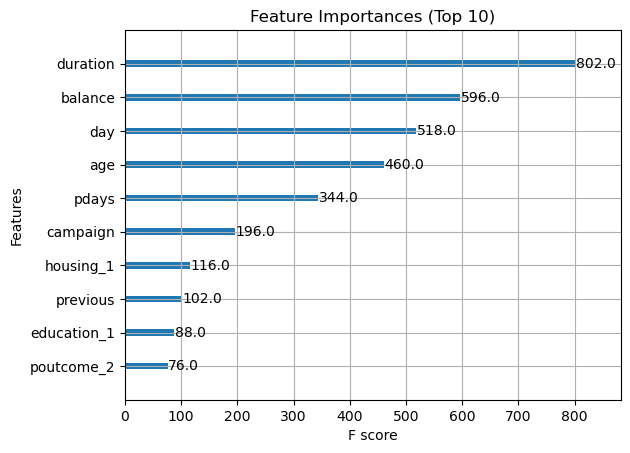

In [81]:
from xgboost import XGBClassifier, plot_importance

feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': xgb.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(feature_importances)


plt.figure(figsize=(10, 6))
plot_importance(xgb, importance_type='weight', max_num_features=10)
plt.title("Feature Importances (Top 10)")
plt.show()

In [80]:
scores = cross_val_score(xgb, X_train, y_train, cv=5, scoring='accuracy')

print("\nCross-Validation Scores:", scores)
print(f"Mean Accuracy: {scores.mean():.2f}")


C:\Users\sevinj.rahimova\AppData\Local\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:24:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\sevinj.rahimova\AppData\Local\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:24:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\sevinj.rahimova\AppData\Local\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:24:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warn


Cross-Validation Scores: [0.93889784 0.94041868 0.94354983 0.9417606  0.93961353]
Mean Accuracy: 0.94


C:\Users\sevinj.rahimova\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


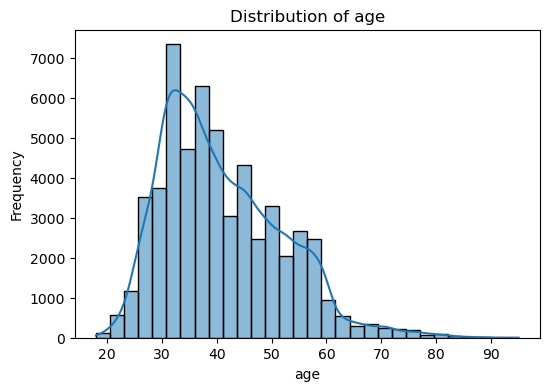

C:\Users\sevinj.rahimova\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


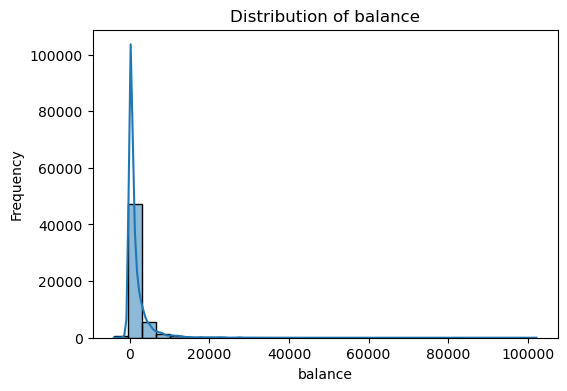

C:\Users\sevinj.rahimova\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


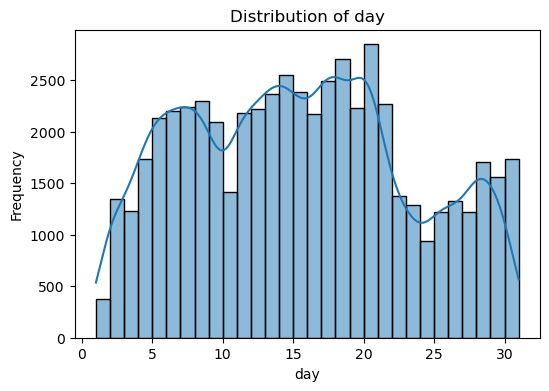

C:\Users\sevinj.rahimova\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


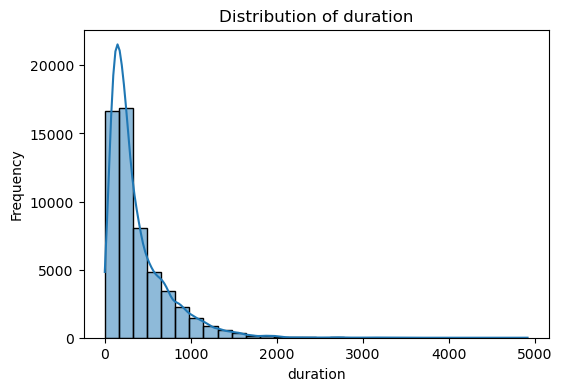

C:\Users\sevinj.rahimova\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


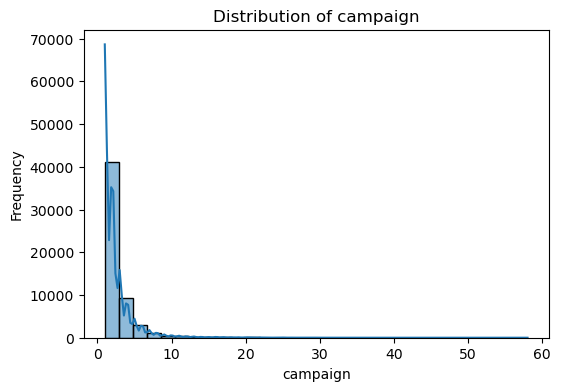

C:\Users\sevinj.rahimova\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


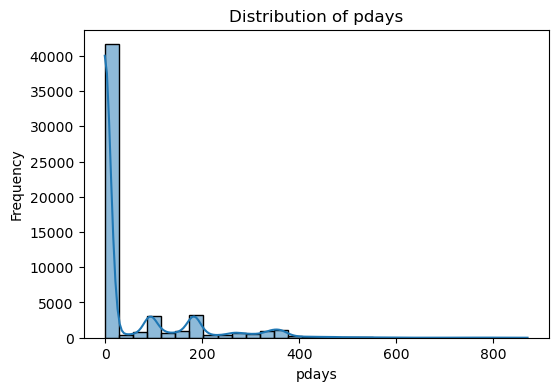

C:\Users\sevinj.rahimova\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


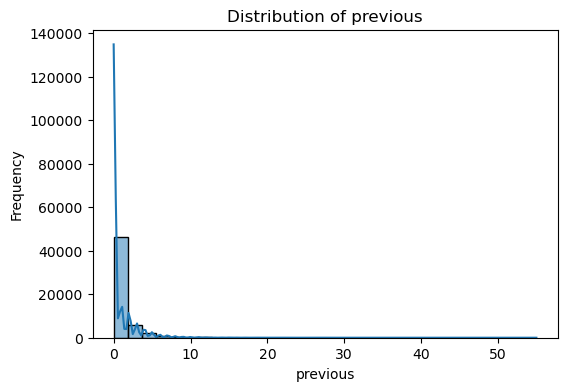

C:\Users\sevinj.rahimova\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sevinj.rahimova\AppData\Local\anaconda3\Lib\site-packages\seaborn\_stats\counting.py:137: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  bin_edges = np.histogram_bin_edges(vals, bins, binrange, weight)
C:\Users\sevinj.rahimova\AppData\Local\anaconda3\Lib\site-packages\seaborn\_stats\counting.py:176: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  hist, edges = np.histogram(vals, **bin_kws, weights=weights, density=density)


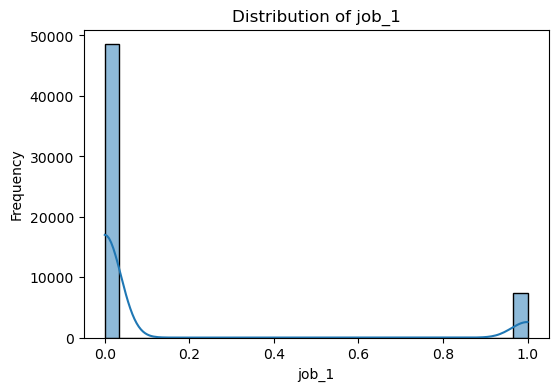

C:\Users\sevinj.rahimova\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sevinj.rahimova\AppData\Local\anaconda3\Lib\site-packages\seaborn\_stats\counting.py:137: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  bin_edges = np.histogram_bin_edges(vals, bins, binrange, weight)
C:\Users\sevinj.rahimova\AppData\Local\anaconda3\Lib\site-packages\seaborn\_stats\counting.py:176: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  hist, edges = np.histogram(vals, **bin_kws, weights=weights, density=density)


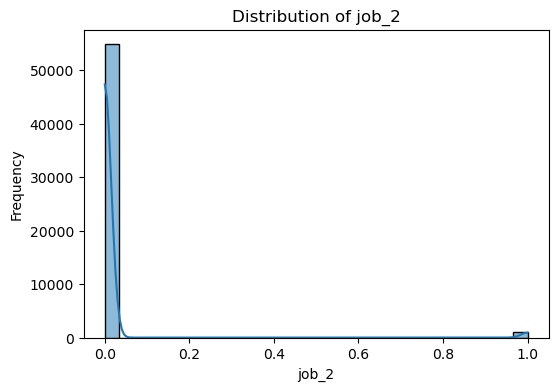

C:\Users\sevinj.rahimova\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sevinj.rahimova\AppData\Local\anaconda3\Lib\site-packages\seaborn\_stats\counting.py:137: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  bin_edges = np.histogram_bin_edges(vals, bins, binrange, weight)
C:\Users\sevinj.rahimova\AppData\Local\anaconda3\Lib\site-packages\seaborn\_stats\counting.py:176: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  hist, edges = np.histogram(vals, **bin_kws, weights=weights, density=density)


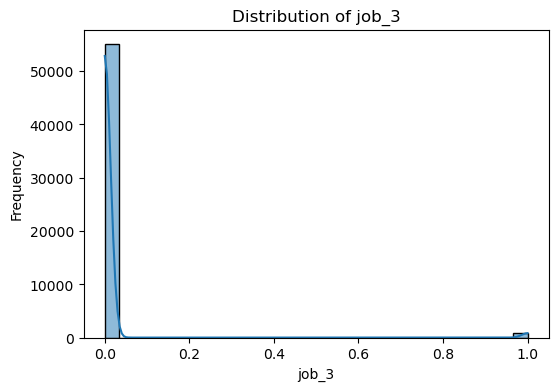

C:\Users\sevinj.rahimova\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sevinj.rahimova\AppData\Local\anaconda3\Lib\site-packages\seaborn\_stats\counting.py:137: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  bin_edges = np.histogram_bin_edges(vals, bins, binrange, weight)
C:\Users\sevinj.rahimova\AppData\Local\anaconda3\Lib\site-packages\seaborn\_stats\counting.py:176: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  hist, edges = np.histogram(vals, **bin_kws, weights=weights, density=density)


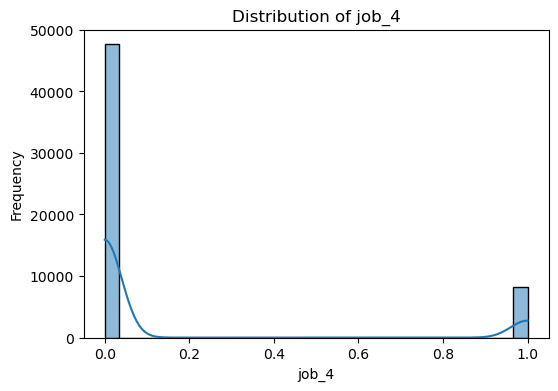

C:\Users\sevinj.rahimova\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sevinj.rahimova\AppData\Local\anaconda3\Lib\site-packages\seaborn\_stats\counting.py:137: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  bin_edges = np.histogram_bin_edges(vals, bins, binrange, weight)
C:\Users\sevinj.rahimova\AppData\Local\anaconda3\Lib\site-packages\seaborn\_stats\counting.py:176: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  hist, edges = np.histogram(vals, **bin_kws, weights=weights, density=density)


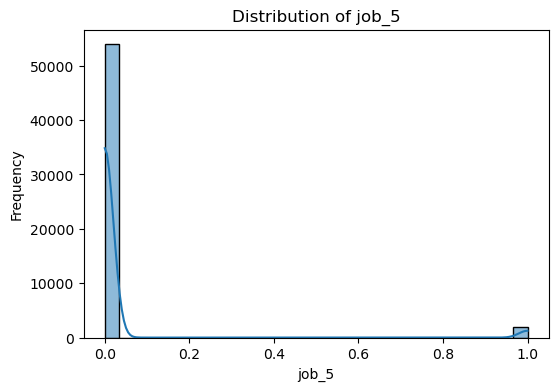

C:\Users\sevinj.rahimova\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sevinj.rahimova\AppData\Local\anaconda3\Lib\site-packages\seaborn\_stats\counting.py:137: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  bin_edges = np.histogram_bin_edges(vals, bins, binrange, weight)
C:\Users\sevinj.rahimova\AppData\Local\anaconda3\Lib\site-packages\seaborn\_stats\counting.py:176: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  hist, edges = np.histogram(vals, **bin_kws, weights=weights, density=density)


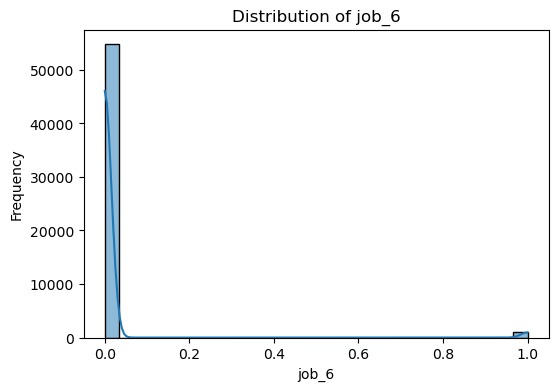

C:\Users\sevinj.rahimova\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sevinj.rahimova\AppData\Local\anaconda3\Lib\site-packages\seaborn\_stats\counting.py:137: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  bin_edges = np.histogram_bin_edges(vals, bins, binrange, weight)
C:\Users\sevinj.rahimova\AppData\Local\anaconda3\Lib\site-packages\seaborn\_stats\counting.py:176: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  hist, edges = np.histogram(vals, **bin_kws, weights=weights, density=density)


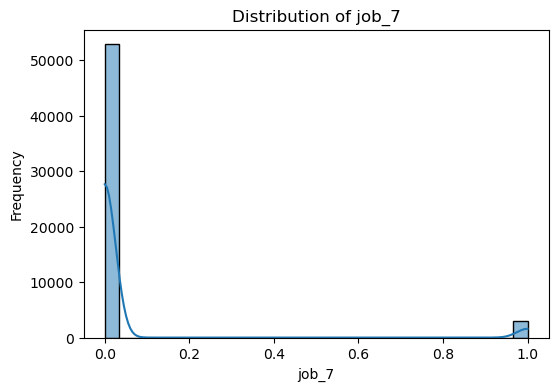

C:\Users\sevinj.rahimova\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sevinj.rahimova\AppData\Local\anaconda3\Lib\site-packages\seaborn\_stats\counting.py:137: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  bin_edges = np.histogram_bin_edges(vals, bins, binrange, weight)
C:\Users\sevinj.rahimova\AppData\Local\anaconda3\Lib\site-packages\seaborn\_stats\counting.py:176: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  hist, edges = np.histogram(vals, **bin_kws, weights=weights, density=density)


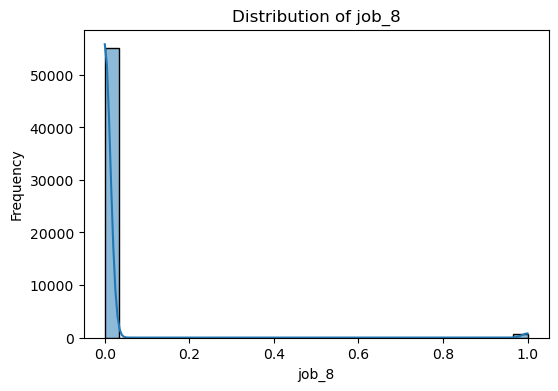

C:\Users\sevinj.rahimova\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sevinj.rahimova\AppData\Local\anaconda3\Lib\site-packages\seaborn\_stats\counting.py:137: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  bin_edges = np.histogram_bin_edges(vals, bins, binrange, weight)
C:\Users\sevinj.rahimova\AppData\Local\anaconda3\Lib\site-packages\seaborn\_stats\counting.py:176: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  hist, edges = np.histogram(vals, **bin_kws, weights=weights, density=density)


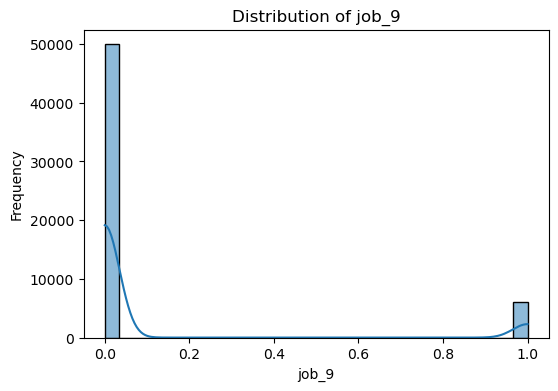

C:\Users\sevinj.rahimova\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sevinj.rahimova\AppData\Local\anaconda3\Lib\site-packages\seaborn\_stats\counting.py:137: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  bin_edges = np.histogram_bin_edges(vals, bins, binrange, weight)
C:\Users\sevinj.rahimova\AppData\Local\anaconda3\Lib\site-packages\seaborn\_stats\counting.py:176: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  hist, edges = np.histogram(vals, **bin_kws, weights=weights, density=density)


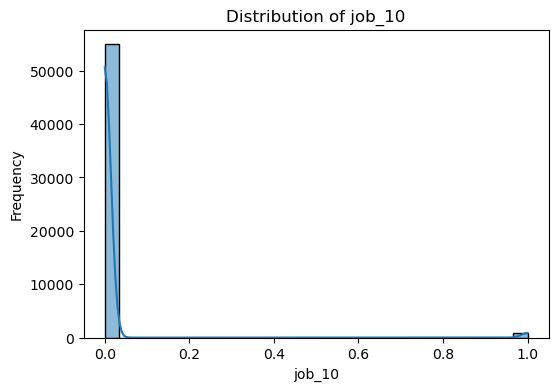

C:\Users\sevinj.rahimova\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sevinj.rahimova\AppData\Local\anaconda3\Lib\site-packages\seaborn\_stats\counting.py:137: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  bin_edges = np.histogram_bin_edges(vals, bins, binrange, weight)
C:\Users\sevinj.rahimova\AppData\Local\anaconda3\Lib\site-packages\seaborn\_stats\counting.py:176: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  hist, edges = np.histogram(vals, **bin_kws, weights=weights, density=density)


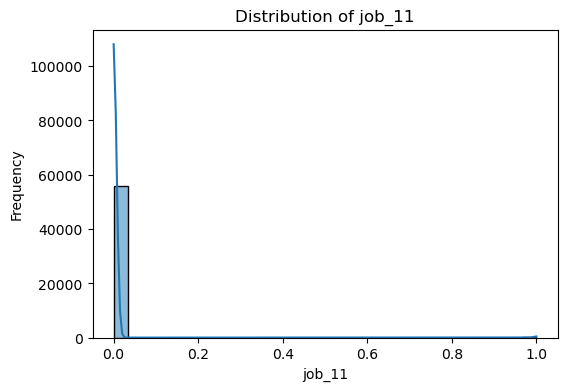

C:\Users\sevinj.rahimova\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sevinj.rahimova\AppData\Local\anaconda3\Lib\site-packages\seaborn\_stats\counting.py:137: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  bin_edges = np.histogram_bin_edges(vals, bins, binrange, weight)
C:\Users\sevinj.rahimova\AppData\Local\anaconda3\Lib\site-packages\seaborn\_stats\counting.py:176: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  hist, edges = np.histogram(vals, **bin_kws, weights=weights, density=density)


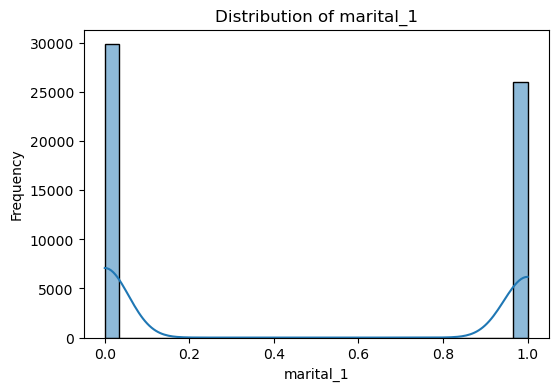

C:\Users\sevinj.rahimova\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sevinj.rahimova\AppData\Local\anaconda3\Lib\site-packages\seaborn\_stats\counting.py:137: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  bin_edges = np.histogram_bin_edges(vals, bins, binrange, weight)
C:\Users\sevinj.rahimova\AppData\Local\anaconda3\Lib\site-packages\seaborn\_stats\counting.py:176: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  hist, edges = np.histogram(vals, **bin_kws, weights=weights, density=density)


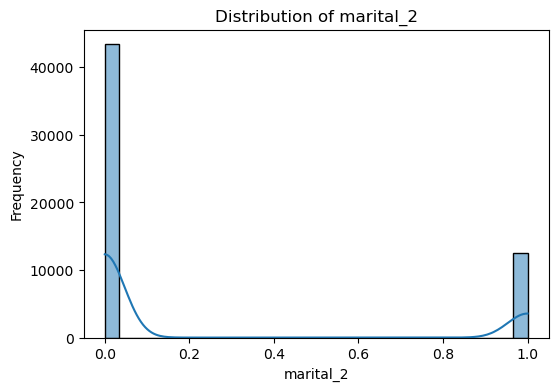

C:\Users\sevinj.rahimova\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sevinj.rahimova\AppData\Local\anaconda3\Lib\site-packages\seaborn\_stats\counting.py:137: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  bin_edges = np.histogram_bin_edges(vals, bins, binrange, weight)
C:\Users\sevinj.rahimova\AppData\Local\anaconda3\Lib\site-packages\seaborn\_stats\counting.py:176: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  hist, edges = np.histogram(vals, **bin_kws, weights=weights, density=density)


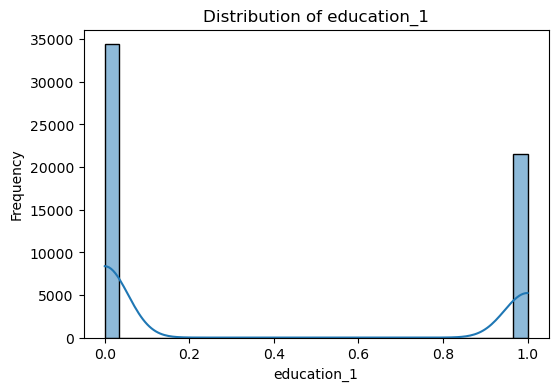

C:\Users\sevinj.rahimova\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sevinj.rahimova\AppData\Local\anaconda3\Lib\site-packages\seaborn\_stats\counting.py:137: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  bin_edges = np.histogram_bin_edges(vals, bins, binrange, weight)
C:\Users\sevinj.rahimova\AppData\Local\anaconda3\Lib\site-packages\seaborn\_stats\counting.py:176: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  hist, edges = np.histogram(vals, **bin_kws, weights=weights, density=density)


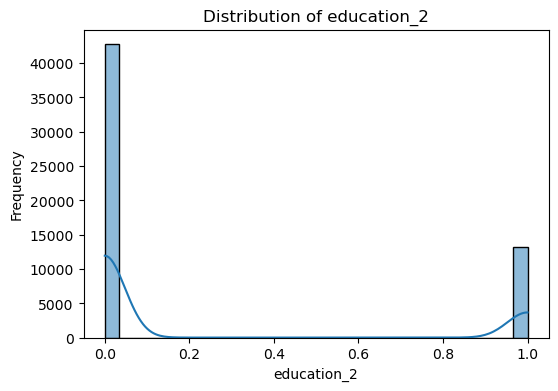

C:\Users\sevinj.rahimova\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sevinj.rahimova\AppData\Local\anaconda3\Lib\site-packages\seaborn\_stats\counting.py:137: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  bin_edges = np.histogram_bin_edges(vals, bins, binrange, weight)
C:\Users\sevinj.rahimova\AppData\Local\anaconda3\Lib\site-packages\seaborn\_stats\counting.py:176: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  hist, edges = np.histogram(vals, **bin_kws, weights=weights, density=density)


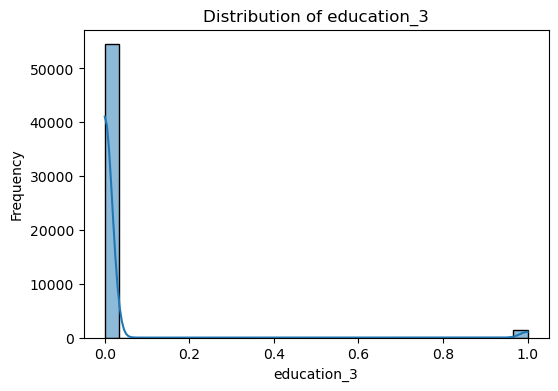

C:\Users\sevinj.rahimova\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sevinj.rahimova\AppData\Local\anaconda3\Lib\site-packages\seaborn\_stats\counting.py:137: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  bin_edges = np.histogram_bin_edges(vals, bins, binrange, weight)
C:\Users\sevinj.rahimova\AppData\Local\anaconda3\Lib\site-packages\seaborn\_stats\counting.py:176: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  hist, edges = np.histogram(vals, **bin_kws, weights=weights, density=density)


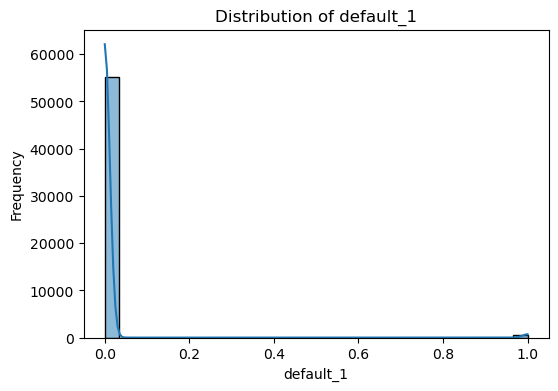

C:\Users\sevinj.rahimova\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sevinj.rahimova\AppData\Local\anaconda3\Lib\site-packages\seaborn\_stats\counting.py:137: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  bin_edges = np.histogram_bin_edges(vals, bins, binrange, weight)
C:\Users\sevinj.rahimova\AppData\Local\anaconda3\Lib\site-packages\seaborn\_stats\counting.py:176: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  hist, edges = np.histogram(vals, **bin_kws, weights=weights, density=density)


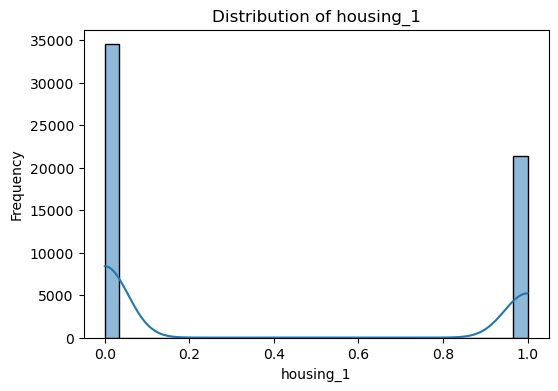

C:\Users\sevinj.rahimova\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sevinj.rahimova\AppData\Local\anaconda3\Lib\site-packages\seaborn\_stats\counting.py:137: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  bin_edges = np.histogram_bin_edges(vals, bins, binrange, weight)
C:\Users\sevinj.rahimova\AppData\Local\anaconda3\Lib\site-packages\seaborn\_stats\counting.py:176: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  hist, edges = np.histogram(vals, **bin_kws, weights=weights, density=density)


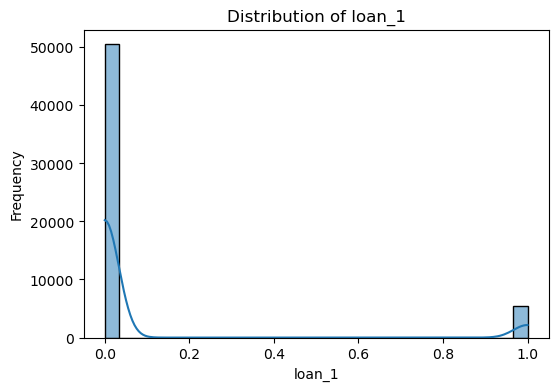

C:\Users\sevinj.rahimova\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sevinj.rahimova\AppData\Local\anaconda3\Lib\site-packages\seaborn\_stats\counting.py:137: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  bin_edges = np.histogram_bin_edges(vals, bins, binrange, weight)
C:\Users\sevinj.rahimova\AppData\Local\anaconda3\Lib\site-packages\seaborn\_stats\counting.py:176: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  hist, edges = np.histogram(vals, **bin_kws, weights=weights, density=density)


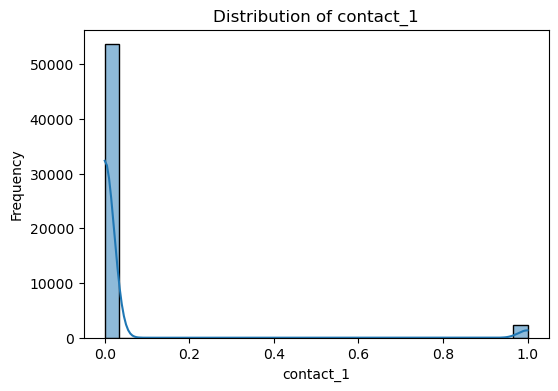

C:\Users\sevinj.rahimova\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sevinj.rahimova\AppData\Local\anaconda3\Lib\site-packages\seaborn\_stats\counting.py:137: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  bin_edges = np.histogram_bin_edges(vals, bins, binrange, weight)
C:\Users\sevinj.rahimova\AppData\Local\anaconda3\Lib\site-packages\seaborn\_stats\counting.py:176: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  hist, edges = np.histogram(vals, **bin_kws, weights=weights, density=density)


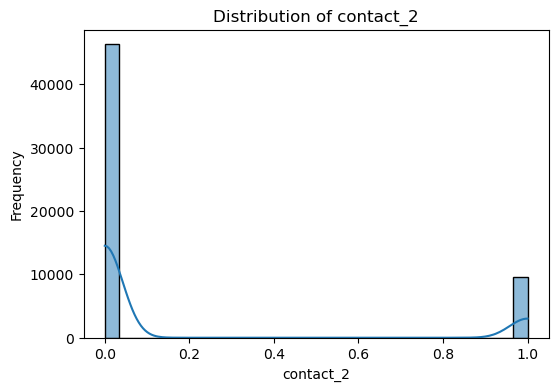

C:\Users\sevinj.rahimova\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sevinj.rahimova\AppData\Local\anaconda3\Lib\site-packages\seaborn\_stats\counting.py:137: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  bin_edges = np.histogram_bin_edges(vals, bins, binrange, weight)
C:\Users\sevinj.rahimova\AppData\Local\anaconda3\Lib\site-packages\seaborn\_stats\counting.py:176: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  hist, edges = np.histogram(vals, **bin_kws, weights=weights, density=density)


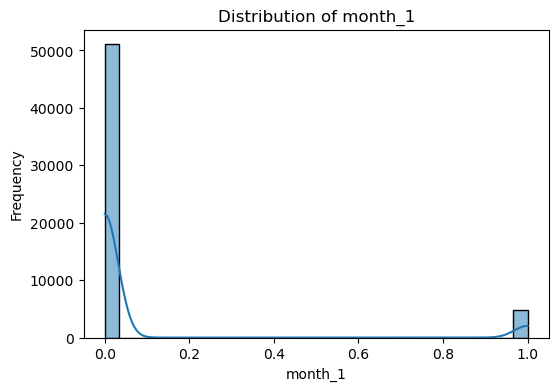

C:\Users\sevinj.rahimova\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sevinj.rahimova\AppData\Local\anaconda3\Lib\site-packages\seaborn\_stats\counting.py:137: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  bin_edges = np.histogram_bin_edges(vals, bins, binrange, weight)
C:\Users\sevinj.rahimova\AppData\Local\anaconda3\Lib\site-packages\seaborn\_stats\counting.py:176: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  hist, edges = np.histogram(vals, **bin_kws, weights=weights, density=density)


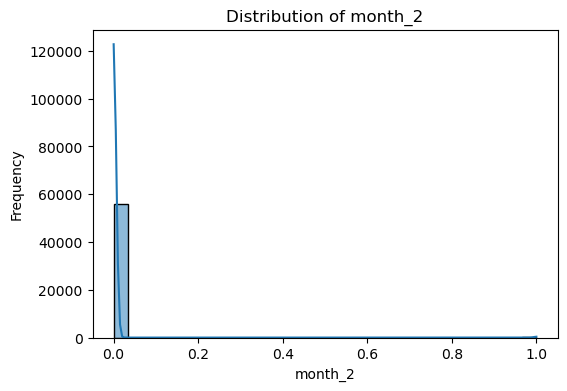

C:\Users\sevinj.rahimova\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sevinj.rahimova\AppData\Local\anaconda3\Lib\site-packages\seaborn\_stats\counting.py:137: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  bin_edges = np.histogram_bin_edges(vals, bins, binrange, weight)
C:\Users\sevinj.rahimova\AppData\Local\anaconda3\Lib\site-packages\seaborn\_stats\counting.py:176: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  hist, edges = np.histogram(vals, **bin_kws, weights=weights, density=density)


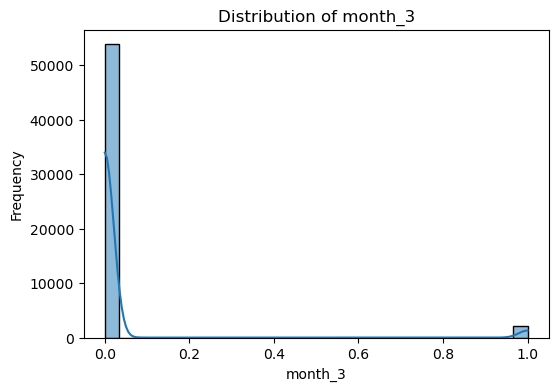

C:\Users\sevinj.rahimova\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sevinj.rahimova\AppData\Local\anaconda3\Lib\site-packages\seaborn\_stats\counting.py:137: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  bin_edges = np.histogram_bin_edges(vals, bins, binrange, weight)
C:\Users\sevinj.rahimova\AppData\Local\anaconda3\Lib\site-packages\seaborn\_stats\counting.py:176: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  hist, edges = np.histogram(vals, **bin_kws, weights=weights, density=density)


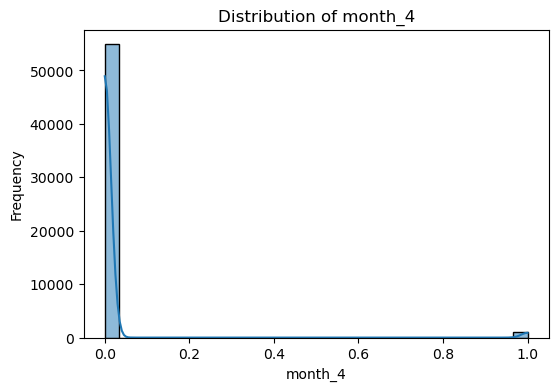

C:\Users\sevinj.rahimova\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sevinj.rahimova\AppData\Local\anaconda3\Lib\site-packages\seaborn\_stats\counting.py:137: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  bin_edges = np.histogram_bin_edges(vals, bins, binrange, weight)
C:\Users\sevinj.rahimova\AppData\Local\anaconda3\Lib\site-packages\seaborn\_stats\counting.py:176: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  hist, edges = np.histogram(vals, **bin_kws, weights=weights, density=density)


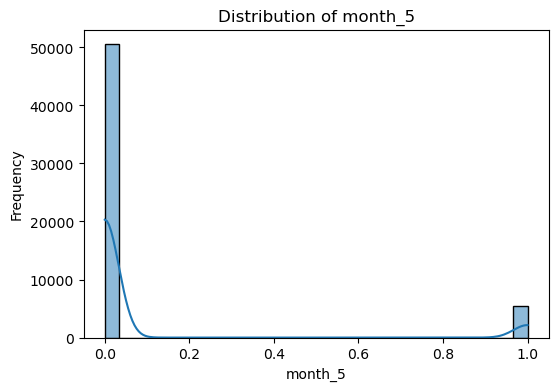

C:\Users\sevinj.rahimova\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sevinj.rahimova\AppData\Local\anaconda3\Lib\site-packages\seaborn\_stats\counting.py:137: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  bin_edges = np.histogram_bin_edges(vals, bins, binrange, weight)
C:\Users\sevinj.rahimova\AppData\Local\anaconda3\Lib\site-packages\seaborn\_stats\counting.py:176: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  hist, edges = np.histogram(vals, **bin_kws, weights=weights, density=density)


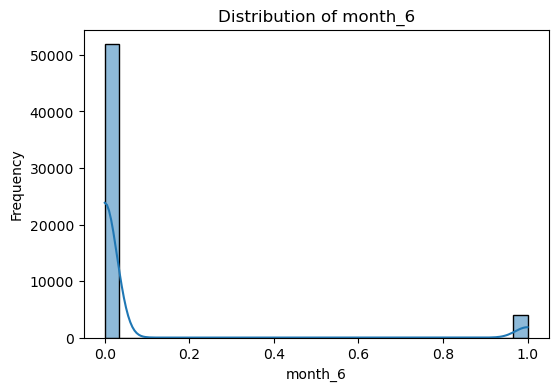

C:\Users\sevinj.rahimova\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sevinj.rahimova\AppData\Local\anaconda3\Lib\site-packages\seaborn\_stats\counting.py:137: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  bin_edges = np.histogram_bin_edges(vals, bins, binrange, weight)
C:\Users\sevinj.rahimova\AppData\Local\anaconda3\Lib\site-packages\seaborn\_stats\counting.py:176: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  hist, edges = np.histogram(vals, **bin_kws, weights=weights, density=density)


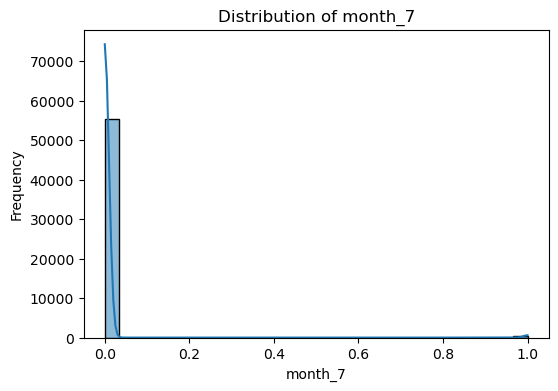

C:\Users\sevinj.rahimova\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sevinj.rahimova\AppData\Local\anaconda3\Lib\site-packages\seaborn\_stats\counting.py:137: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  bin_edges = np.histogram_bin_edges(vals, bins, binrange, weight)
C:\Users\sevinj.rahimova\AppData\Local\anaconda3\Lib\site-packages\seaborn\_stats\counting.py:176: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  hist, edges = np.histogram(vals, **bin_kws, weights=weights, density=density)


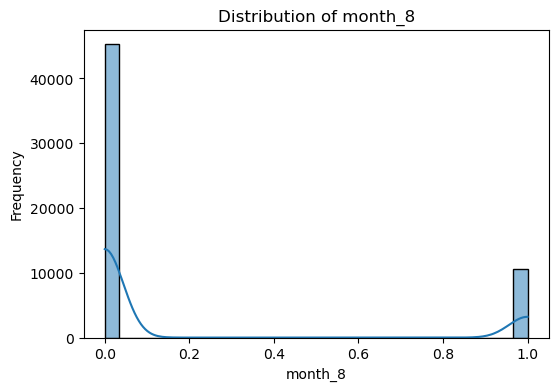

C:\Users\sevinj.rahimova\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sevinj.rahimova\AppData\Local\anaconda3\Lib\site-packages\seaborn\_stats\counting.py:137: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  bin_edges = np.histogram_bin_edges(vals, bins, binrange, weight)
C:\Users\sevinj.rahimova\AppData\Local\anaconda3\Lib\site-packages\seaborn\_stats\counting.py:176: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  hist, edges = np.histogram(vals, **bin_kws, weights=weights, density=density)


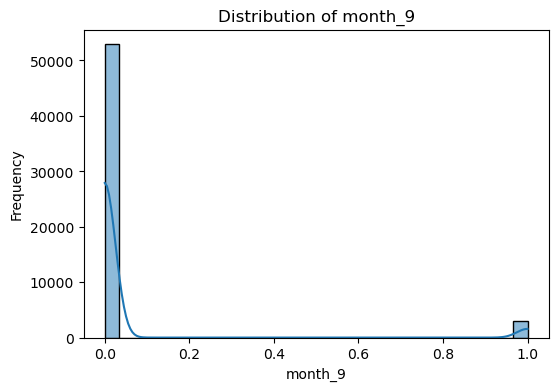

C:\Users\sevinj.rahimova\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sevinj.rahimova\AppData\Local\anaconda3\Lib\site-packages\seaborn\_stats\counting.py:137: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  bin_edges = np.histogram_bin_edges(vals, bins, binrange, weight)
C:\Users\sevinj.rahimova\AppData\Local\anaconda3\Lib\site-packages\seaborn\_stats\counting.py:176: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  hist, edges = np.histogram(vals, **bin_kws, weights=weights, density=density)


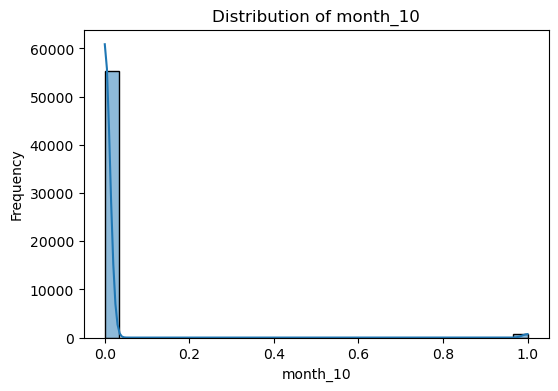

C:\Users\sevinj.rahimova\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sevinj.rahimova\AppData\Local\anaconda3\Lib\site-packages\seaborn\_stats\counting.py:137: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  bin_edges = np.histogram_bin_edges(vals, bins, binrange, weight)
C:\Users\sevinj.rahimova\AppData\Local\anaconda3\Lib\site-packages\seaborn\_stats\counting.py:176: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  hist, edges = np.histogram(vals, **bin_kws, weights=weights, density=density)


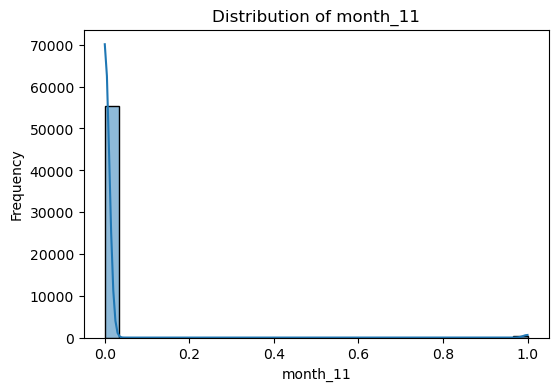

C:\Users\sevinj.rahimova\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sevinj.rahimova\AppData\Local\anaconda3\Lib\site-packages\seaborn\_stats\counting.py:137: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  bin_edges = np.histogram_bin_edges(vals, bins, binrange, weight)
C:\Users\sevinj.rahimova\AppData\Local\anaconda3\Lib\site-packages\seaborn\_stats\counting.py:176: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  hist, edges = np.histogram(vals, **bin_kws, weights=weights, density=density)


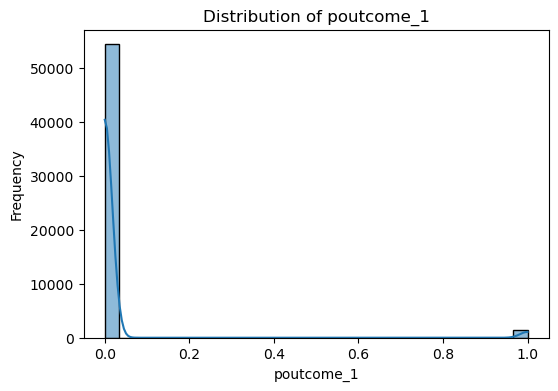

C:\Users\sevinj.rahimova\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sevinj.rahimova\AppData\Local\anaconda3\Lib\site-packages\seaborn\_stats\counting.py:137: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  bin_edges = np.histogram_bin_edges(vals, bins, binrange, weight)
C:\Users\sevinj.rahimova\AppData\Local\anaconda3\Lib\site-packages\seaborn\_stats\counting.py:176: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  hist, edges = np.histogram(vals, **bin_kws, weights=weights, density=density)


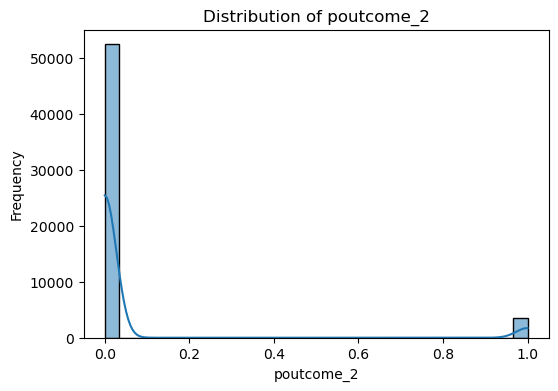

C:\Users\sevinj.rahimova\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sevinj.rahimova\AppData\Local\anaconda3\Lib\site-packages\seaborn\_stats\counting.py:137: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  bin_edges = np.histogram_bin_edges(vals, bins, binrange, weight)
C:\Users\sevinj.rahimova\AppData\Local\anaconda3\Lib\site-packages\seaborn\_stats\counting.py:176: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  hist, edges = np.histogram(vals, **bin_kws, weights=weights, density=density)


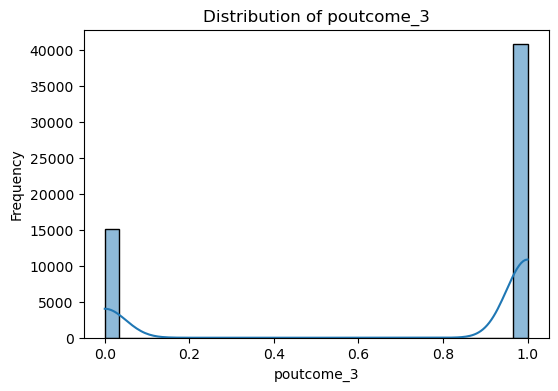

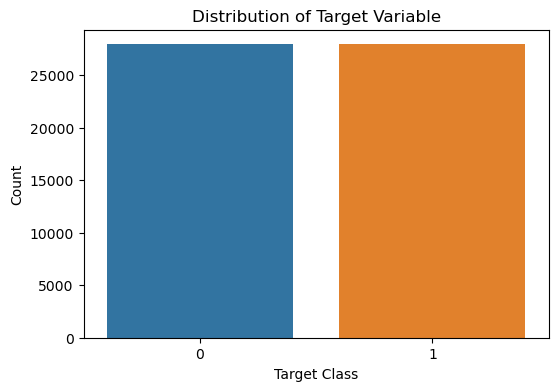

In [83]:
import seaborn as sns


# Fərdi xüsusiyyətlərin paylanması
for column in X_train.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(X_train[column], kde=True, bins=30)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

# Target (y_train) dəyişəninin paylanması
plt.figure(figsize=(6, 4))
sns.countplot(x=y_train)
plt.title("Distribution of Target Variable")
plt.xlabel("Target Class")
plt.ylabel("Count")
plt.show()


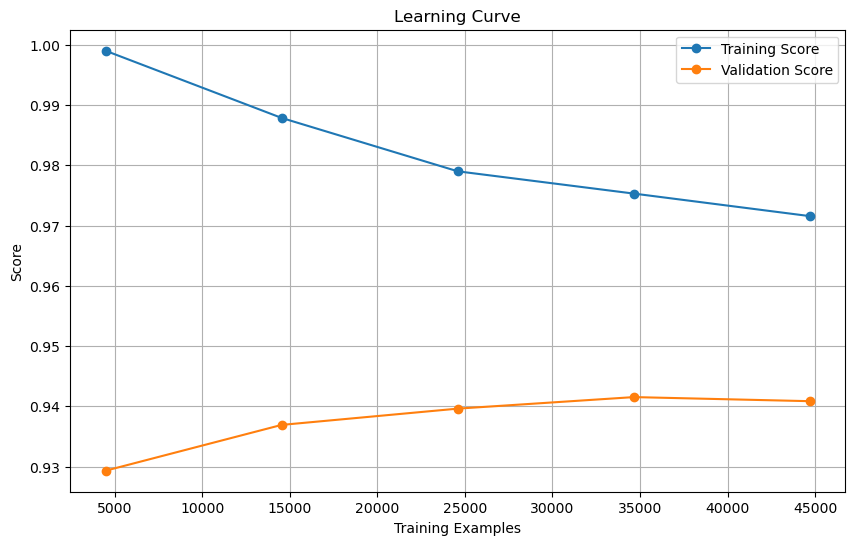

In [84]:
from sklearn.model_selection import learning_curve

# Learning curve funksiyası
def plot_learning_curve(estimator, X, y, cv=5, scoring="accuracy"):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, scoring=scoring, n_jobs=-1
    )
    
    train_scores_mean = train_scores.mean(axis=1)
    test_scores_mean = test_scores.mean(axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, label="Training Score", marker="o")
    plt.plot(train_sizes, test_scores_mean, label="Validation Score", marker="o")
    plt.title("Learning Curve")
    plt.xlabel("Training Examples")
    plt.ylabel("Score")
    plt.legend(loc="best")
    plt.grid()
    plt.show()

# XGBoost modeli üçün Learning Curve
plot_learning_curve(xgb, X_train, y_train, cv=5, scoring="accuracy")


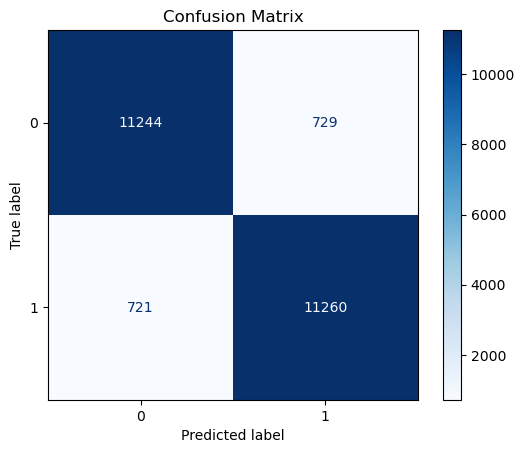

In [85]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion matrix
y_pred = xgb.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Vizualizasiya
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb.classes_)
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix")
plt.show()


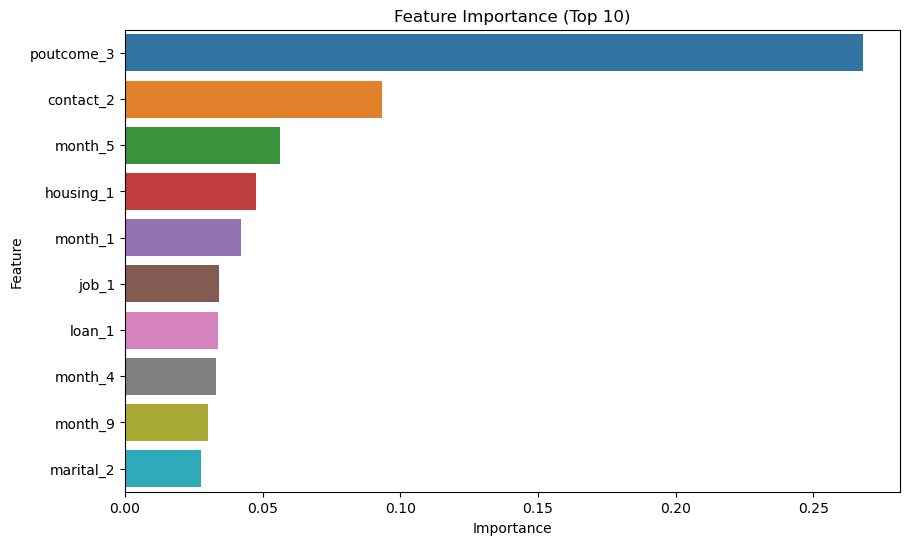

In [86]:

feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': xgb.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Vizualizasiya
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(10))
plt.title("Feature Importance (Top 10)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()



In [87]:
from sklearn.metrics import accuracy_score

# Təlim və test nəticələrini əldə et
y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)

# Təlim və test dəqiqliyini (accuracy) hesabla
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

# Performans fərqi
print(f"Performance Gap: {train_accuracy - test_accuracy:.2f}")


Training Accuracy: 0.97
Test Accuracy: 0.94
Performance Gap: 0.03


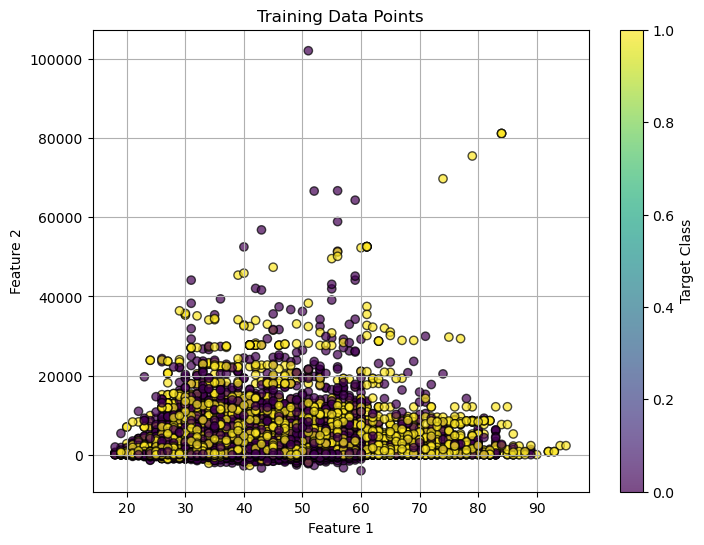

In [88]:
import matplotlib.pyplot as plt
import numpy as np

# Təlimdə istifadə olunan əsas iki xüsusiyyəti seçək
feature1 = X_train.iloc[:, 0]  # İlk xüsusiyyət
feature2 = X_train.iloc[:, 1]  # İkinci xüsusiyyət

# Hədəf sinifləri rənglə fərqləndirək
plt.figure(figsize=(8, 6))
plt.scatter(feature1, feature2, c=y_train, cmap='viridis', alpha=0.7, edgecolor='k')
plt.title("Training Data Points")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label="Target Class")
plt.grid()
plt.show()


C:\Users\sevinj.rahimova\AppData\Local\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:29:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


<Figure size 800x600 with 0 Axes>

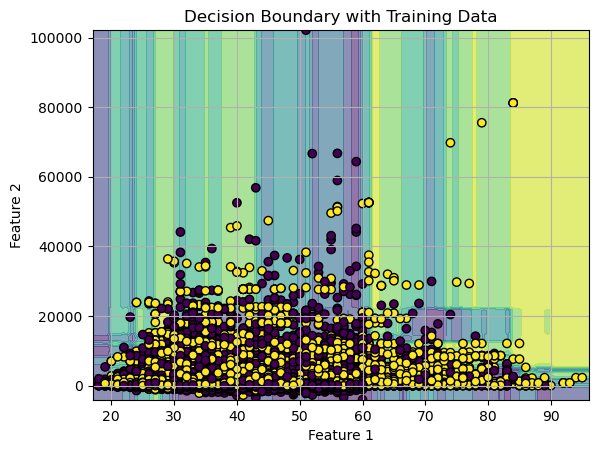

In [89]:
from sklearn.inspection import DecisionBoundaryDisplay

# Yalnız ilk iki xüsusiyyəti seçək (2D qrafik üçün)
X_train_2d = X_train.iloc[:, :2]

# XGBoost modelini yenidən təlim et (ilk iki xüsusiyyət üçün)
xgb_2d = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_2d.fit(X_train_2d, y_train)

# Decision boundary vizualizasiyası
plt.figure(figsize=(8, 6))
DecisionBoundaryDisplay.from_estimator(xgb_2d, X_train_2d, cmap='viridis', alpha=0.6)
plt.scatter(X_train_2d.iloc[:, 0], X_train_2d.iloc[:, 1], c=y_train, cmap='viridis', edgecolor="k")
plt.title("Decision Boundary with Training Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid()
plt.show()



In [90]:
# Logloss dinamikası
results = xgb.evals_result()

plt.figure(figsize=(8, 6))
plt.plot(results['validation_0']['logloss'], label='Training Loss', color='blue')
plt.plot(results['validation_1']['logloss'], label='Validation Loss', color='orange')
plt.title("Loss Dynamics During Training")
plt.xlabel("Epoch")
plt.ylabel("Log Loss")
plt.legend()
plt.grid()
plt.show()



XGBoostError: No evaluation result, `eval_set` is not used during training.

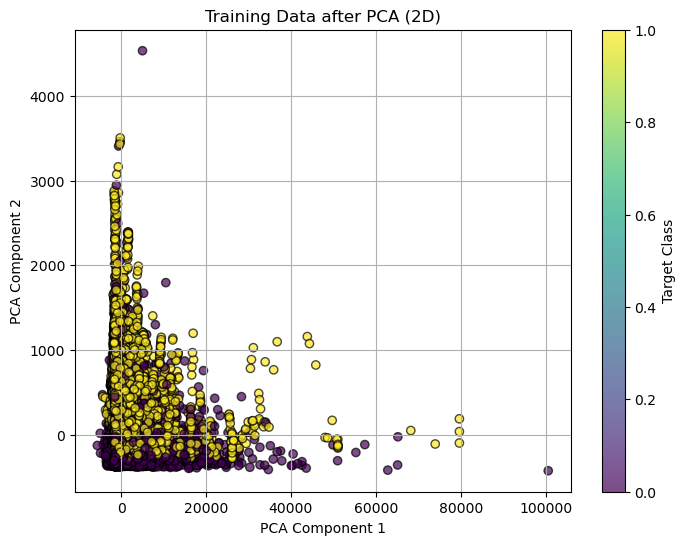

In [91]:
from sklearn.decomposition import PCA

# PCA ilə verilənləri 2D-yə endirmək
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

# Qrafiklə göstərmək
plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', alpha=0.7, edgecolor='k')
plt.title("Training Data after PCA (2D)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Target Class")
plt.grid()
plt.show()


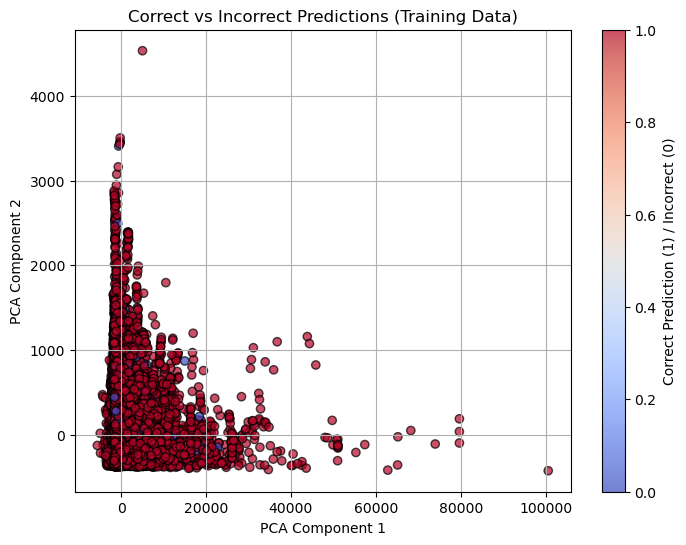

In [92]:
# Təlimdə prediksiyalar
y_train_pred = xgb.predict(X_train)

plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=(y_train == y_train_pred), cmap='coolwarm', alpha=0.7, edgecolor='k')
plt.title("Correct vs Incorrect Predictions (Training Data)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Correct Prediction (1) / Incorrect (0)")
plt.grid()
plt.show()
